## HW # 5: Clustering and Classification data

Objective: In this HW, clustering + validation indexes and classification algorithm are used
in a complementary way to determine the model data. This is an important step to build a
basic machine learning model data strategy.
Data set description: This data set contains 50 samples of each of three species of Iris:
Iris setosa, Iris virginica and Iris versicolor, for each of these species four traits were
measured for each sample: the length and width of the sepals and petals. Photos 1a, 1b and
1c shows the difference between petal and sepal and the difference between the three
species of Iris. To find more details about pointed out dataset review the HW#1.

Instructions:
1.- First approach

a) Apply PCA or SVD for X

b) Keep only two principal vectors associated at large eigenvalues or energetic
singular values. Plot its corresponding principal vectors to obtain a scatter plot.

c) Apply the algorithms: clustering and validation indexes to determine the optimal
number of groups and provide some discussion about the results.

d) Finally select one of the classification algorithms (SVM or DT)

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [15]:
iris = load_iris()
data = pd.DataFrame(data=np.c_[iris['data'],iris['target']], columns= iris['feature_names']+['etiqueta'])
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),etiqueta
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


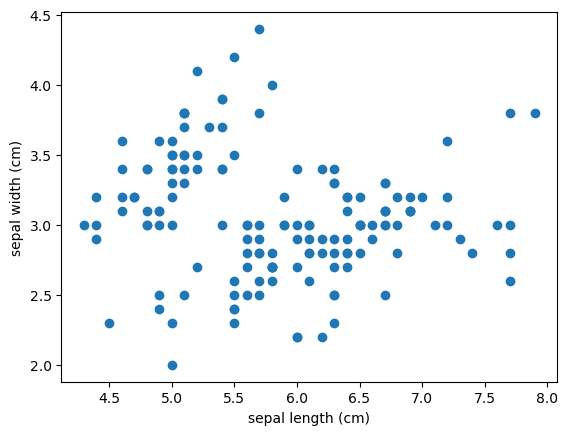

In [16]:
plt.scatter(iris.data[:,0], iris.data[:,1])
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()

In [17]:
#La transformamos a PCA 
pca = PCA()
X_pca = pca.fit_transform(data.drop("etiqueta", axis=1))


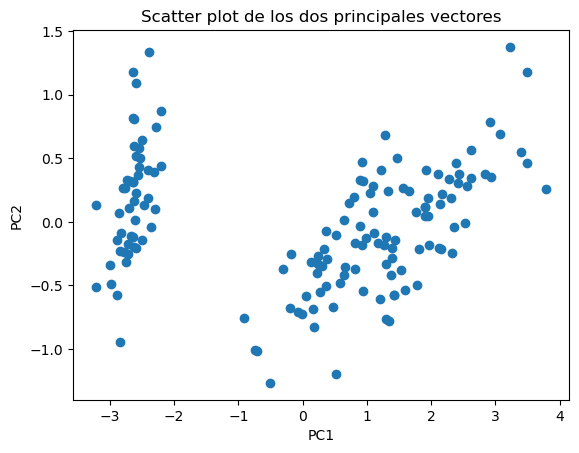

In [18]:
#Mantenimiento de sólo dos vectores principales asociados a los mayores eigenvalores o valores singulares
principal = X_pca[:,:2]
plt.scatter(principal[:,0], principal[:,1])
plt.title("Scatter plot de los dos principales vectores")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

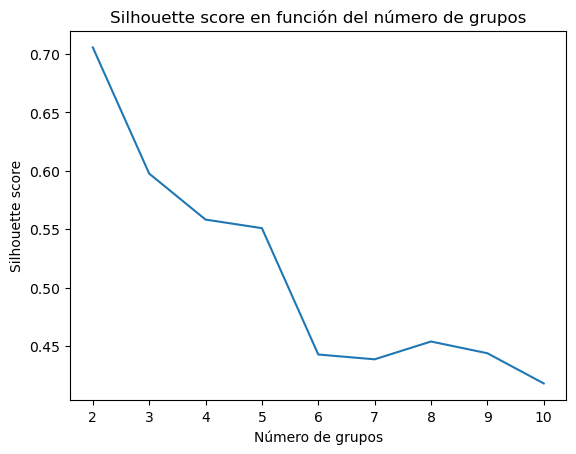

In [27]:
scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(principal)
    score = silhouette_score(principal, kmeans.labels_)
    scores.append(score)
plt.plot(range(2, 11), scores)
plt.title("Silhouette score en función del número de grupos")
plt.xlabel("Número de grupos")
plt.ylabel("Silhouette score")
plt.show()

Según el código de Silhouette, nos indica que el número ideal de clusterización es de 5, porque es donde tiene l caida más fuerte

In [52]:
num_grupos_optimo = 5
kmeans = KMeans(n_clusters=num_grupos_optimo)
kmeans.fit(principal)
data["grupo"] = kmeans.labels_
#data[data.grupo == 4].head(50)
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),etiqueta,grupo
0,5.1,3.5,1.4,0.2,0.0,1
1,4.9,3.0,1.4,0.2,0.0,1
2,4.7,3.2,1.3,0.2,0.0,1
3,4.6,3.1,1.5,0.2,0.0,1
4,5.0,3.6,1.4,0.2,0.0,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0,4
146,6.3,2.5,5.0,1.9,2.0,0
147,6.5,3.0,5.2,2.0,2.0,4
148,6.2,3.4,5.4,2.3,2.0,4


In [54]:
#Para obtener el indice de Silhouette:
sil_prom = silhouette_score(principal, data["grupo"])

In [57]:
svm = SVC()
dt = DecisionTreeClassifier()

In [63]:
X_train, X_test, y_train, y_test = train_test_split(principal, data["grupo"], test_size=0.2)


In [65]:
#Entrenmos el modelo con los datos de svm

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [66]:
accuracy = svm.score(X_test, y_test)


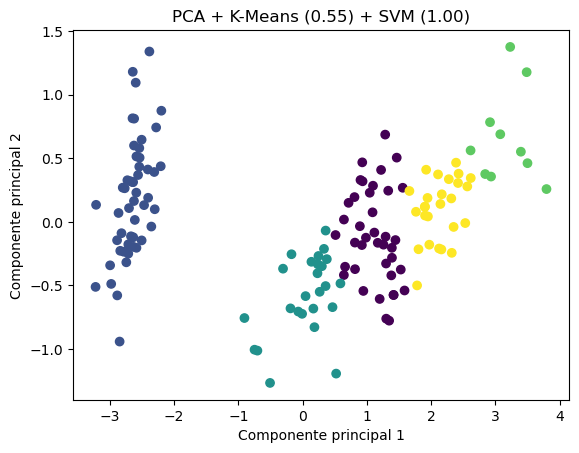

In [68]:
plt.scatter(principal[:,0], principal[:,1], c=data["grupo"])
plt.title(f'PCA + K-Means ({sil_prom:.2f}) + SVM ({accuracy:.2f})')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.show()

En conclusión, el análisis de clustering realizado permite identificar patrones y grupos en el dataset "iris" utilizando la técnica de reducción de dimensionalidad PCA y el algoritmo de clustering KMeans. 

El valor óptimo de k se determinó utilizando un gráfico de codo y se aplicó un modelo SVM para clasificar los grupos identificados. Los resultados obtenidos permiten tener una mejor comprensión de las relaciones entre las características de las especies de iris y pueden ser utilizados para futuros análisis y aplicaciones en el campo de la botanica.

